In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [71]:
#–ó–ê–í–î–ê–ù–ù–Ø 1
df = pd.read_csv("shopping_trends.csv", encoding="latin1")
df.head(5)

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo Code Used  \
0    Credit Card        Express              Yes             Yes   
1  Bank Transfer        Express              Yes             Yes   
2           Cash  Free Shipping              Yes             Yes   
3         PayPal   Next Day Air              Yes             Yes   
4           Cash  Free Shipping              Yes             Yes   

   Previous Purchases Preferred Payment Method Frequency of Purchases  
0                  14                    Venmo            Fortnightly  
1                   2                     Cash            Fortnightly  
2                  23              Credit Card                 Weekly  
3                  49                   PayPal                 Weekly  
4                  31                   PayPal               Annually

In [15]:
df.shape

(3900, 19)

In [76]:
df = df.rename(columns={'Customer ID':'customer_id', 'Age':'age', 'Gender':'gender', 'Item Purchased':'item_purchased', 'Category':'category', 'Purchase Amount (USD)':'purchase_amount', 'Location':'location', 'Size':'size', 'Color':'color', 'Season':'season', 'Review Rating':'review_rating', 'Subscription Status':'subscription_status', 'Payment Method':'payment_method', 'Shipping Type':'shipping_type', 'Discount Applied':'discount_applied', 'Promo Code Used':'promo_code_used', 'Previous Purchases':'previous_purchases', 'Preferred Payment Method':'preferred_payment_method', 'Frequency of Purchases':'frequency_of_purchases'})
df = df.replace("-", np.nan)
df = df.apply(lambda col: col.fillna(col.mean()) if np.issubdtype(col.dtype, np.number) else col)
df.isna().sum()

customer_id                 0
age                         0
gender                      0
item_purchased              0
category                    0
purchase_amount             0
location                    0
size                        0
color                       0
season                      0
review_rating               0
subscription_status         0
payment_method              0
shipping_type               0
discount_applied            0
promo_code_used             0
previous_purchases          0
preferred_payment_method    0
frequency_of_purchases      0
dtype: int64

In [33]:
df.head(5)

customer_id  age gender item_purchased  category  purchase_amount  \
0            1   55   Male         Blouse  Clothing               53   
1            2   19   Male        Sweater  Clothing               64   
2            3   50   Male          Jeans  Clothing               73   
3            4   21   Male        Sandals  Footwear               90   
4            5   45   Male         Blouse  Clothing               49   

        location size      color  season  review_rating subscription_status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  payment_method  shipping_type discount_applied promo_code_used  \
0    Credit Card        Express              Yes             Yes   
1  Bank Transfer        Express              Yes             Yes   
2           Cash  Free Shipping              Yes             Yes   
3         PayPal   Next Day Air              Yes             Yes   
4           Cash  Free Shipping              Yes             Yes   

   previous_purchases preferred_payment_method frequency_of_purchases  
0                  14                    Venmo            Fortnightly  
1                   2                     Cash            Fortnightly  
2                  23              Credit Card                 Weekly  
3                  49                   PayPal                 Weekly  
4                  31                   PayPal               Annually

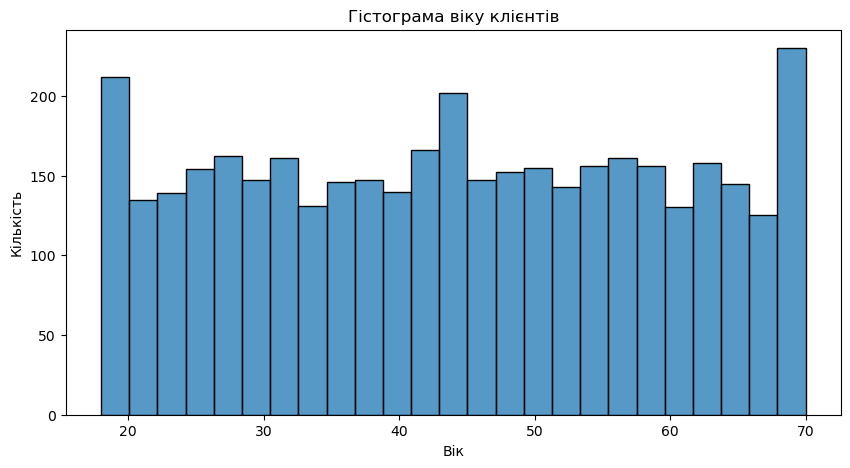

In [18]:
#1. –ì—ñ—Å—Ç–æ–≥—Ä–∞–º–∞ –≤—ñ–∫—É (age): –ü–æ–±—É–¥—É–π—Ç–µ –≥—ñ—Å—Ç–æ–≥—Ä–∞–º—É –≤—ñ–∫—É –∫–ª—ñ—î–Ω—Ç—ñ–≤, –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—é—á–∏ Seaborn.
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age', bins=25)  # bins - –∫—ñ–ª—å–∫—ñ—Å—Ç—å –∫–æ—Ä–∑–∏–Ω, kde - –≤–∫–ª—é—á–µ–Ω–Ω—è –Ω–æ—Ä–º–æ–≤–∞–Ω–æ—ó –æ—Ü—ñ–Ω–∫–∏ —â—ñ–ª—å–Ω–æ—Å—Ç—ñ
plt.title("–ì—ñ—Å—Ç–æ–≥—Ä–∞–º–∞ –≤—ñ–∫—É –∫–ª—ñ—î–Ω—Ç—ñ–≤")
plt.xlabel('–í—ñ–∫')
plt.ylabel('–ö—ñ–ª—å–∫—ñ—Å—Ç—å')
plt.show()

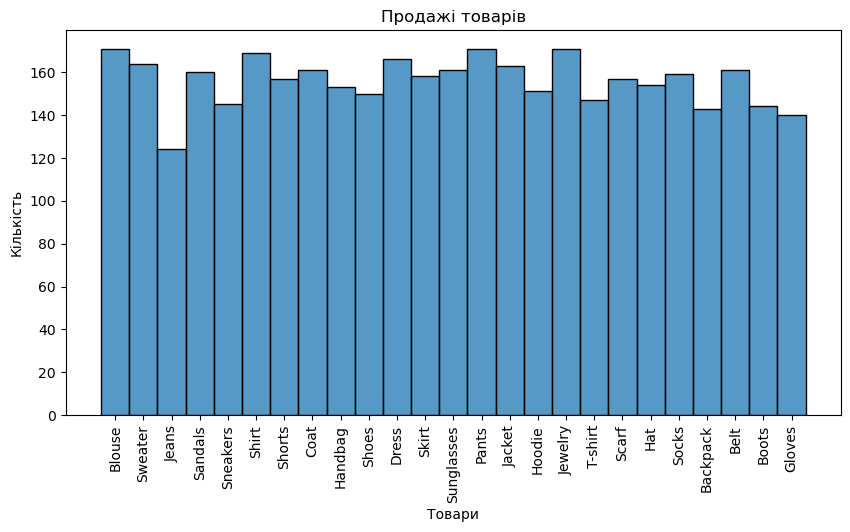

In [19]:
#2. –ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è —Ä–æ–∑–ø–æ–¥—ñ–ª—É –ø–æ–∫—É–ø–æ–∫ –∑–∞ —Å—Ç–∞—Ç—Ç–µ—é (item_purchased):
#–°—Ç–≤–æ—Ä—ñ—Ç—å —Å—Ç–æ–≤–ø—á–∞—Å—Ç—É –¥—ñ–∞–≥—Ä–∞–º—É –∞–±–æ –≥—Ä–∞—Ñ—ñ–∫ —Ä–æ–∑–ø–æ–¥—ñ–ª—É, —â–æ–± –ø–æ—Ä—ñ–≤–Ω—è—Ç–∏, —è–∫—ñ
#—Ç–æ–≤–∞—Ä–∏ –ø–æ–∫—É–ø–∞—é—Ç—å –∫–ª—ñ—î–Ω—Ç–∏ –Ω–∞–π—á–∞—Å—Ç—ñ—à–µ.
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='item_purchased', bins=25)
plt.title("–ü—Ä–æ–¥–∞–∂—ñ —Ç–æ–≤–∞—Ä—ñ–≤")
plt.xlabel('–¢–æ–≤–∞—Ä–∏')
plt.xticks(rotation=90)
plt.ylabel('–ö—ñ–ª—å–∫—ñ—Å—Ç—å')
plt.show()

Text(0, 0.5, '–ö—ñ–ª—å–∫—ñ—Å—Ç—å –ø–æ–∫—É–ø–æ–∫')

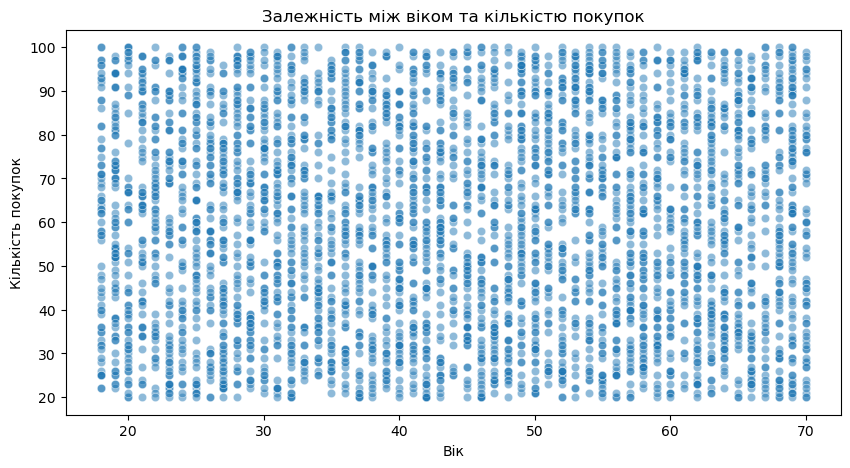

In [70]:
#3. –ó–∞–ª–µ–∂–Ω—ñ—Å—Ç—å –º—ñ–∂ –≤—ñ–∫–æ–º —Ç–∞ —Å—É–º–æ—é –ø–æ–∫—É–ø–æ–∫ (purchase_amount):
#–í–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É–π—Ç–µ scatter plot, —â–æ–± –≤—ñ–∑—É–∞–ª—ñ–∑—É–≤–∞—Ç–∏ –∑–∞–ª–µ–∂–Ω—ñ—Å—Ç—å –º—ñ–∂ –≤—ñ–∫–æ–º —Ç–∞
#—Å—É–º–æ—é –ø–æ–∫—É–ø–æ–∫.
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='age', y='purchase_amount', alpha=0.5)
plt.title('–ó–∞–ª–µ–∂–Ω—ñ—Å—Ç—å –º—ñ–∂ –≤—ñ–∫–æ–º —Ç–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—é –ø–æ–∫—É–ø–æ–∫')
plt.xlabel('–í—ñ–∫')
plt.ylabel('–ö—ñ–ª—å–∫—ñ—Å—Ç—å –ø–æ–∫—É–ø–æ–∫')

Text(0, 0.5, '–û—Ü—ñ–Ω–∫–∏')

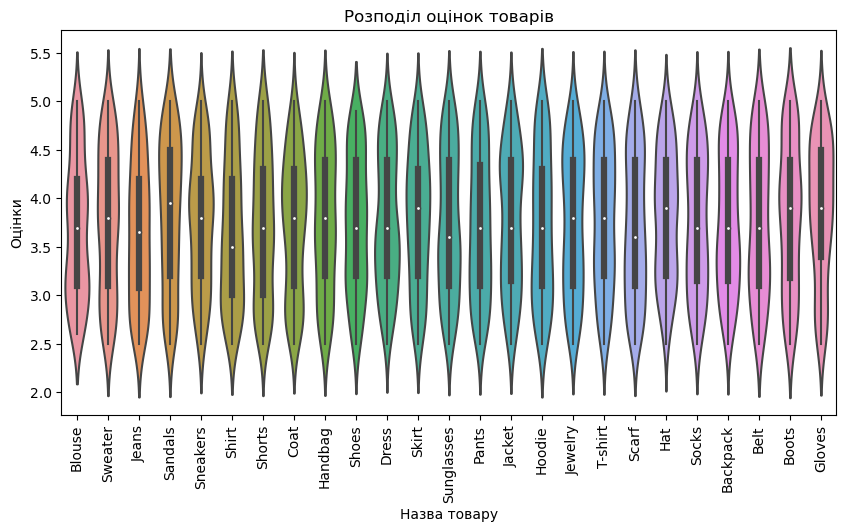

In [21]:
#4. –ì—Ä–∞—Ñ—ñ–∫ —Ä–æ–∑–ø–æ–¥—ñ–ª—É –æ—Ü—ñ–Ω–æ–∫ —Ç–æ–≤–∞—Ä—ñ–≤ (review_rating):
#–ü–æ–±—É–¥—É–π—Ç–µ –≥—Ä–∞—Ñ—ñ–∫ —Ä–æ–∑–ø–æ–¥—ñ–ª—É –æ—Ü—ñ–Ω–æ–∫ —Ç–æ–≤–∞—Ä—ñ–≤ –¥–ª—è –æ—Ü—ñ–Ω–∫–∏ —è–∫–æ—Å—Ç—ñ
plt.figure(figsize=(10, 5))
sns.violinplot(x='item_purchased', y='review_rating', data=df)
plt.title('–†–æ–∑–ø–æ–¥—ñ–ª –æ—Ü—ñ–Ω–æ–∫ —Ç–æ–≤–∞—Ä—ñ–≤')
plt.xlabel('–ù–∞–∑–≤–∞ —Ç–æ–≤–∞—Ä—É')
plt.xticks(rotation=90)
plt.ylabel('–û—Ü—ñ–Ω–∫–∏')

Text(0, 0.5, '–°—Ç–∞—Ç—å')

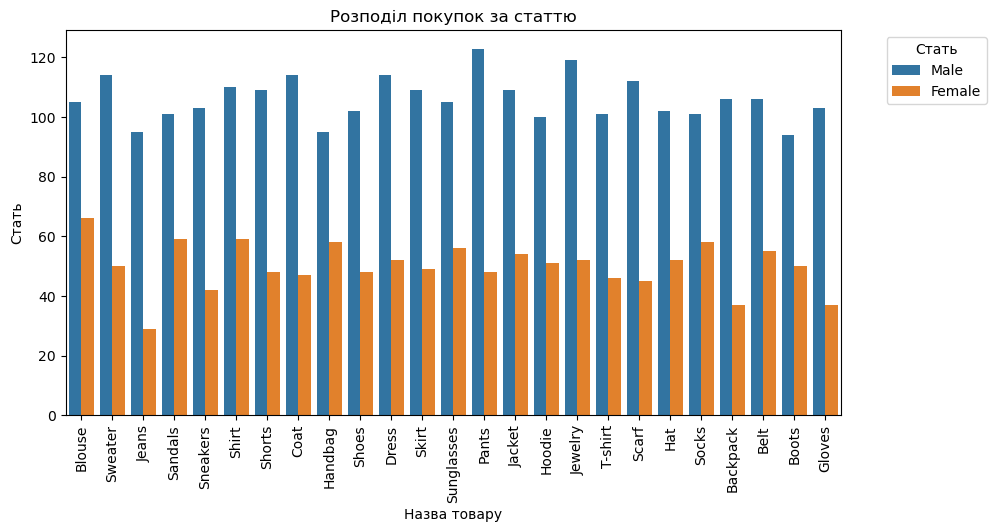

In [65]:
#5. –ö–∞—Ç–µ–≥–æ—Ä—ñ–∞–ª—å–Ω–∞ –¥—ñ–∞–≥—Ä–∞–º–∞ –¥–ª—è —Å—Ç–∞—Ç—ñ (gender):
#–°—Ç–≤–æ—Ä—ñ—Ç—å –∫–∞—Ç–µ–≥–æ—Ä—ñ–∞–ª—å–Ω—É –¥—ñ–∞–≥—Ä–∞–º—É, —â–æ–± –≤—ñ–¥–æ–±—Ä–∞–∑–∏—Ç–∏ —Ä–æ–∑–ø–æ–¥—ñ–ª –ø–æ–∫—É–ø–æ–∫ –∑–∞
#—Å—Ç–∞—Ç—Ç–µ—é.
plt.figure(figsize=(10, 5))
sns.countplot(x='item_purchased', hue='gender', data=df)
plt.title('–†–æ–∑–ø–æ–¥—ñ–ª –ø–æ–∫—É–ø–æ–∫ –∑–∞ —Å—Ç–∞—Ç—Ç—é')
plt.legend(title='–°—Ç–∞—Ç—å', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('–ù–∞–∑–≤–∞ —Ç–æ–≤–∞—Ä—É')
plt.xticks(rotation=90)
plt.ylabel('–°—Ç–∞—Ç—å')

Text(0, 0.5, '–ö—ñ–ª—å–∫—ñ—Å—Ç—å –ø–æ–∫—É–ø–æ–∫')

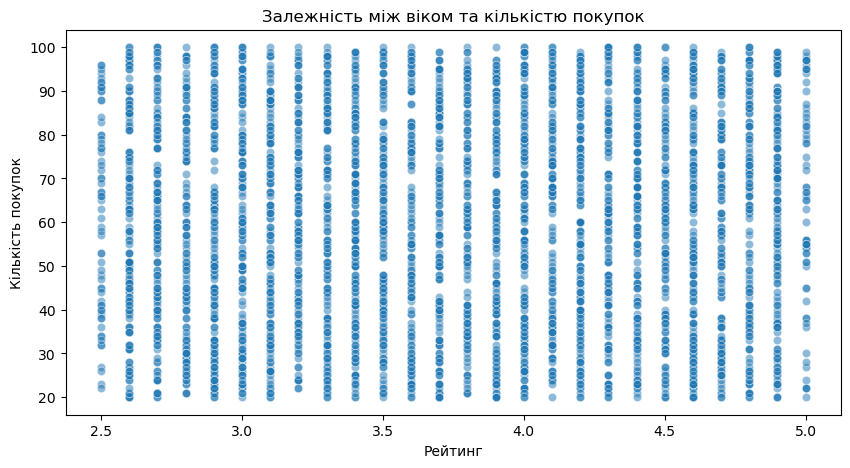

In [67]:
#6. –ó–∞–ª–µ–∂–Ω—ñ—Å—Ç—å –º—ñ–∂ —Ä–µ–π—Ç–∏–Ω–≥–æ–º —ñ —Å—É–º–æ—é –ø–æ–∫—É–ø–æ–∫ (review_rating —ñ purchase_amount):
#–í–∏–≤—á—ñ—Ç—å, —á–∏ —ñ—Å–Ω—É—î –∑–≤'—è–∑–æ–∫ –º—ñ–∂ —Ä–µ–π—Ç–∏–Ω–≥–æ–º —Ç–æ–≤–∞—Ä—É —ñ —Å—É–º–æ—é –ø–æ–∫—É–ø–æ–∫ –∑–∞
#–¥–æ–ø–æ–º–æ–≥–æ—é scatter plot.
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='review_rating', y='purchase_amount', alpha=0.5)
plt.title('–ó–∞–ª–µ–∂–Ω—ñ—Å—Ç—å –º—ñ–∂ –≤—ñ–∫–æ–º —Ç–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—é –ø–æ–∫—É–ø–æ–∫')
plt.xlabel('–†–µ–π—Ç–∏–Ω–≥')
plt.ylabel('–ö—ñ–ª—å–∫—ñ—Å—Ç—å –ø–æ–∫—É–ø–æ–∫')

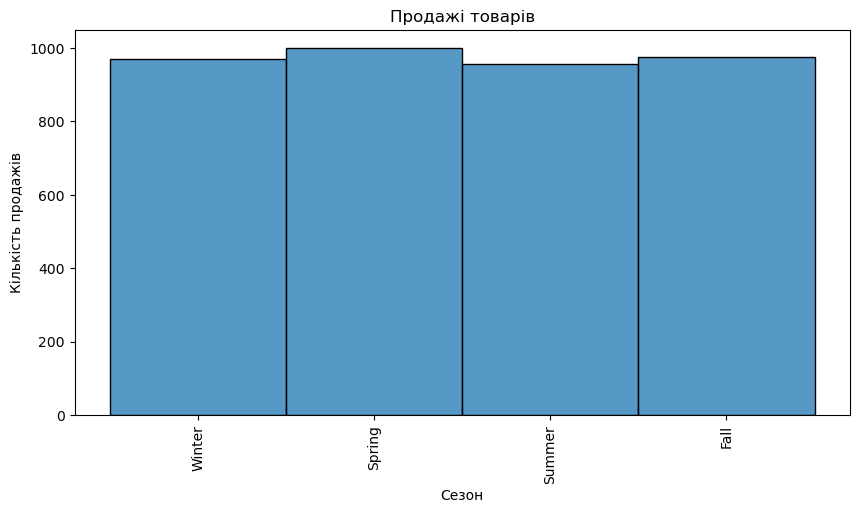

In [31]:
#7. –°–µ–∑–æ–Ω–Ω—ñ—Å—Ç—å –ø–æ–∫—É–ø–æ–∫ (season):
#–ü–æ–±—É–¥—É–π—Ç–µ —Å—Ç–æ–≤–ø—á–∞—Ç—É –¥—ñ–∞–≥—Ä–∞–º—É, —è–∫–∞ –≤—ñ–¥–æ–±—Ä–∞–∂–∞—î, –≤ —è–∫–∏–π —Å–µ–∑–æ–Ω –∫–ª—ñ—î–Ω—Ç–∏
#—Ä–æ–±–ª—è—Ç—å –Ω–∞–π–±—ñ–ª—å—à–µ –ø–æ–∫—É–ø–æ–∫.
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='season', bins=25)
plt.title("–ü—Ä–æ–¥–∞–∂—ñ —Ç–æ–≤–∞—Ä—ñ–≤")
plt.xlabel('–°–µ–∑–æ–Ω')
plt.xticks(rotation=90)
plt.ylabel('–ö—ñ–ª—å–∫—ñ—Å—Ç—å –ø—Ä–æ–¥–∞–∂—ñ–≤')
plt.show()

Text(0, 0.5, '–ö—ñ–ª—å–∫—ñ—Å—Ç—å')

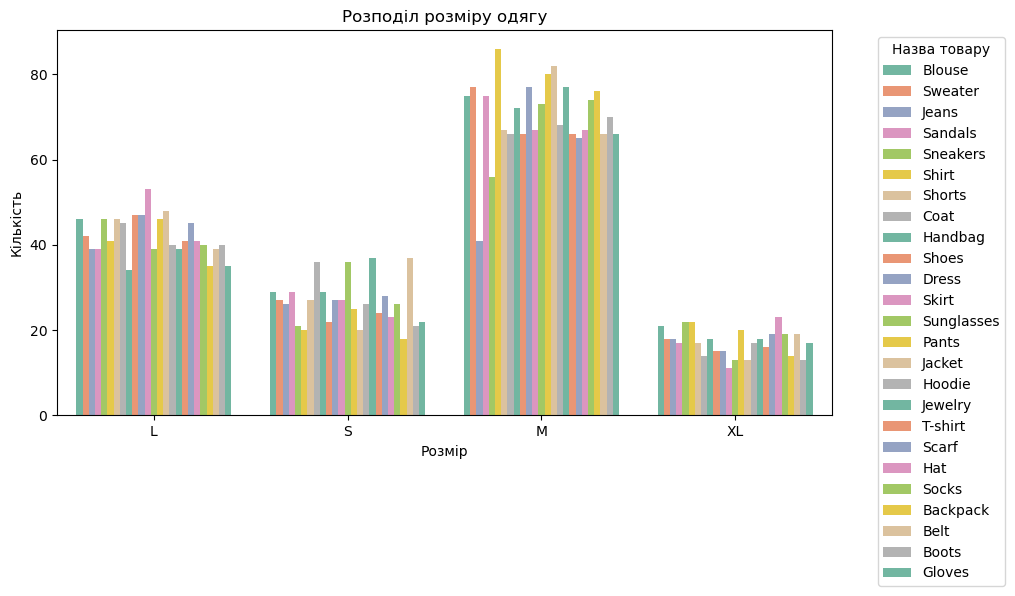

In [46]:
#8. –ì—Ä–∞—Ñ—ñ–∫ —Ä–æ–∑–ø–æ–¥—ñ–ª—É —Ä–æ–∑–º—ñ—Ä—ñ–≤ –æ–¥—è–≥—É (size):
#–°—Ç–≤–æ—Ä—ñ—Ç—å –≥—Ä–∞—Ñ—ñ–∫ —Ä–æ–∑–ø–æ–¥—ñ–ª—É —Ä–æ–∑–º—ñ—Ä—ñ–≤ –æ–¥—è–≥—É, —â–æ–± –≤–∏–∑–Ω–∞—á–∏—Ç–∏ –ø–æ–ø—É–ª—è—Ä–Ω—ñ—Å—Ç—å
#—Ä—ñ–∑–Ω–∏—Ö —Ä–æ–∑–º—ñ—Ä—ñ–≤.
plt.figure(figsize=(10, 5))
sns.countplot(x='size', hue='item_purchased', data=df, palette='Set2')
plt.title('–†–æ–∑–ø–æ–¥—ñ–ª —Ä–æ–∑–º—ñ—Ä—É –æ–¥—è–≥—É')
plt.legend(title='–ù–∞–∑–≤–∞ —Ç–æ–≤–∞—Ä—É', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('–†–æ–∑–º—ñ—Ä')
plt.ylabel('–ö—ñ–ª—å–∫—ñ—Å—Ç—å')

Text(0, 0.5, '–ö—ñ–ª—å–∫—ñ—Å—Ç—å')

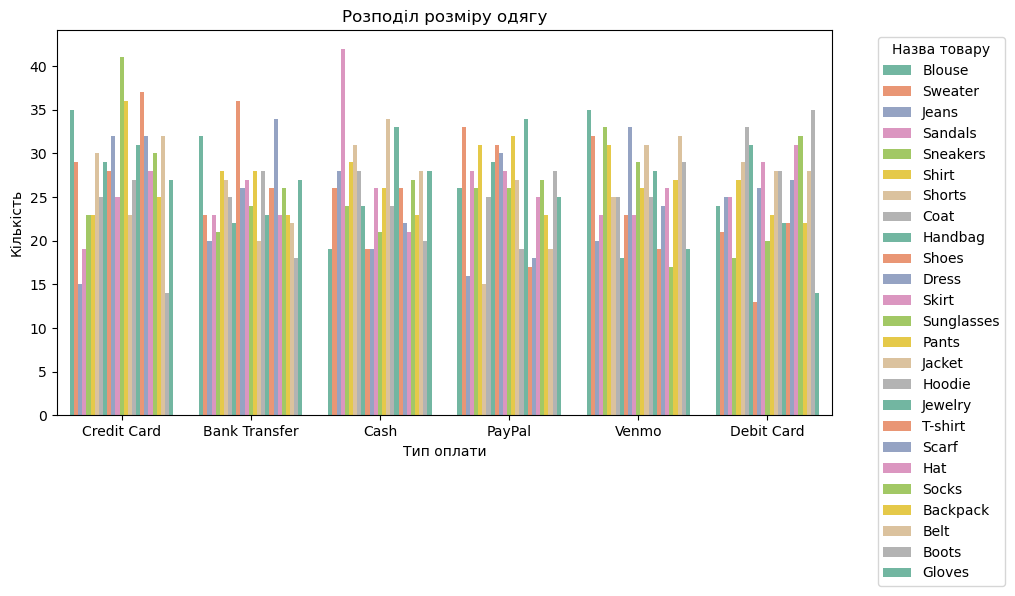

In [51]:
#9. –ö—ñ–ª—å–∫—ñ—Å—Ç—å –ø–æ–∫—É–ø–æ–∫ –≤—ñ–¥–Ω–æ—Å–Ω–æ —Ç–∏–ø—É –æ–ø–ª–∞—Ç–∏ (payment_method):
#–ü–æ—Ä—ñ–≤–Ω—è–π—Ç–µ, —Å–∫—ñ–ª—å–∫–∏ –ø–æ–∫—É–ø–æ–∫ —Ä–æ–±–∏—Ç—å—Å—è –∑–∞ —Ä—ñ–∑–Ω–∏–º–∏ –º–µ—Ç–æ–¥–∞–º–∏ –æ–ø–ª–∞—Ç–∏ –∑–∞
#–¥–æ–ø–æ–º–æ–≥–æ—é —Å—Ç–æ–≤–ø—á–∞—Ç–æ—ó –¥—ñ–∞–≥—Ä–∞–º–∏.
plt.figure(figsize=(10, 5))
sns.countplot(x='payment_method', hue='item_purchased', data=df, palette='Set2')
plt.title('–†–æ–∑–ø–æ–¥—ñ–ª —Ä–æ–∑–º—ñ—Ä—É –æ–¥—è–≥—É')
plt.legend(title='–ù–∞–∑–≤–∞ —Ç–æ–≤–∞—Ä—É', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('–¢–∏–ø –æ–ø–ª–∞—Ç–∏')
plt.ylabel('–ö—ñ–ª—å–∫—ñ—Å—Ç—å')

Text(0, 0.5, '–ö—ñ–ª—å–∫—ñ—Å—Ç—å –ø–æ–∫—É–ø–æ–∫')

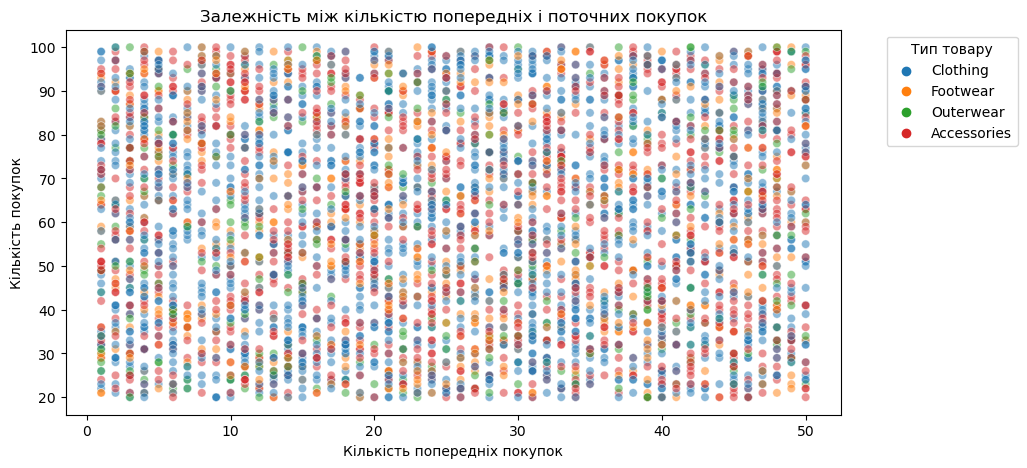

In [77]:
#10.–ó–∞–ª–µ–∂–Ω—ñ—Å—Ç—å –º—ñ–∂ –∫—ñ–ª—å–∫—ñ—Å—Ç—é –ø–æ–ø–µ—Ä–µ–¥–Ω—ñ—Ö –ø–æ–∫—É–ø–æ–∫ (previous_purchases) —ñ
#—Å—É–º–æ—é –ø–æ—Ç–æ—á–Ω–æ—ó –ø–æ–∫—É–ø–∫–∏ (purchase_amount):
#–°—Ç–≤–æ—Ä—ñ—Ç—å scatter plot –¥–ª—è –≤–∏–∑–Ω–∞—á–µ–Ω–Ω—è, —á–∏ —ñ—Å–Ω—É—î –∑–≤'—è–∑–æ–∫ –º—ñ–∂ –∫—ñ–ª—å–∫—ñ—Å—Ç—é
#–ø–æ–ø–µ—Ä–µ–¥–Ω—ñ—Ö –ø–æ–∫—É–ø–æ–∫ —Ç–∞ —Å—É–º–æ—é –ø–æ—Ç–æ—á–Ω–æ—ó –ø–æ–∫—É–ø–∫–∏.
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='previous_purchases', y='purchase_amount', hue='category', alpha=0.5)
plt.title('–ó–∞–ª–µ–∂–Ω—ñ—Å—Ç—å –º—ñ–∂ –∫—ñ–ª—å–∫—ñ—Å—Ç—é –ø–æ–ø–µ—Ä–µ–¥–Ω—ñ—Ö —ñ –ø–æ—Ç–æ—á–Ω–∏—Ö –ø–æ–∫—É–ø–æ–∫')
plt.legend(title='–¢–∏–ø —Ç–æ–≤–∞—Ä—É', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('–ö—ñ–ª—å–∫—ñ—Å—Ç—å –ø–æ–ø–µ—Ä–µ–¥–Ω—ñ—Ö –ø–æ–∫—É–ø–æ–∫')
plt.ylabel('–ö—ñ–ª—å–∫—ñ—Å—Ç—å –ø–æ–∫—É–ø–æ–∫')

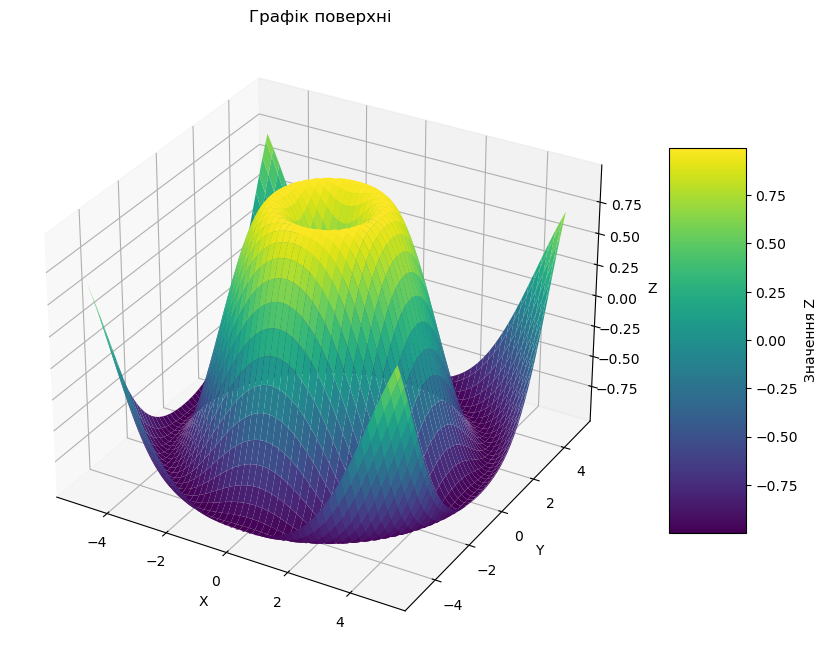

In [85]:
#–ó–ê–í–î–ê–ù–ù–Ø 2
#–ü–æ–±—É–¥—É–π—Ç–µ –≥—Ä–∞—Ñ—ñ–∫ –ø–æ–≤–µ—Ä—Ö–Ω—ñ (3D surface plot) –¥–ª—è –≤—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—ó –∑–∞–ª–µ–∂–Ω–æ—Å—Ç—ñ
#–º—ñ–∂ —Ç—Ä—å–æ–º–∞ —á–∏—Å–ª–æ–≤–∏–º–∏ –∑–º—ñ–Ω–Ω–∏–º–∏ –∑ –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–Ω—è–º –±—ñ–±–ª—ñ–æ—Ç–µ–∫–∏ Seaborn.
#–ù–∞–ª–∞—à—Ç—É–π—Ç–µ –≤—ñ–¥–æ–±—Ä–∞–∂–µ–Ω–Ω—è –≥—Ä–∞—Ñ—ñ–∫–∞, –≤–∫–ª—é—á–∞—é—á–∏ –Ω–∞–∑–≤—É –≥—Ä–∞—Ñ—ñ–∫—É, –ø—ñ–¥–ø–∏—Å–∏
#–æ—Å–µ–π —ñ —ñ–Ω—à—ñ –Ω–µ–æ–±—Ö—ñ–¥–Ω—ñ –ø–∞—Ä–∞–º–µ—Ç—Ä–∏ –¥–ª—è –∫—Ä–∞—â–æ–≥–æ —Ä–æ–∑—É–º—ñ–Ω–Ω—è –≤—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—ó.
#–î–æ–¥–∞–π—Ç–µ –∫–æ–ª—å–æ—Ä–æ–≤—É –ª–µ–≥–µ–Ω–¥—É.
#ùëß = ùë†ùëñùëõ ‚àö(ùë•^2 + ùë¶^2), ùë• ‚àà [‚àí5; 5], ùë¶ ‚àà [‚àí5; 5]
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap='viridis')
ax.set_title('–ì—Ä–∞—Ñ—ñ–∫ –ø–æ–≤–µ—Ä—Ö–Ω—ñ')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(surf, shrink=0.5, aspect=5, label='–ó–Ω–∞—á–µ–Ω–Ω—è Z')
plt.show()


In [92]:
#–ó–∞–≤–¥–∞–Ω–Ω—è 3
#–ü–æ–±—É–¥—É–π—Ç–µ –≥—Ä–∞—Ñ—ñ–∫ —Ç–µ–ø–ª–æ–≤–æ—ó –ø–æ–≤–µ—Ä—Ö–Ω—ñ –¥–ª—è –≤—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—ó –∑–∞–ª–µ–∂–Ω–æ—Å—Ç—ñ –º—ñ–∂
#–¥–≤–æ–º–∞ –∞–±–æ –±—ñ–ª—å—à–µ —á–∏—Å–ª–æ–≤–∏–º–∏ –∑–º—ñ–Ω–Ω–∏–º–∏ –Ω–∞ –æ—Å–Ω–æ–≤—ñ –º–∞—Ç—Ä–∏—Ü—ñ –¥–∞–Ω–∏—Ö,
#–≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—é—á–∏ –±—ñ–±–ª—ñ–æ—Ç–µ–∫—É Seaborn.
#–û–ø–∏—Å –∑–∞–≤–¥–∞–Ω–Ω—è:
#–ó–≥–µ–Ω–µ—Ä—É–π—Ç–µ –¥–∞–Ω—ñ, —è–∫—ñ –±—É–¥—É—Ç—å –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ñ —É –≤–∏–≥–ª—è–¥—ñ –º–∞—Ç—Ä–∏—Ü—ñ. –¶—è –º–∞—Ç—Ä–∏—Ü—è
#–º–æ–∂–µ –º—ñ—Å—Ç–∏—Ç—å –∑–Ω–∞—á–µ–Ω–Ω—è –∑–∞–ª–µ–∂–Ω–æ—Å—Ç—ñ –º—ñ–∂ –¥–≤–æ–º–∞ –∞–±–æ –±—ñ–ª—å—à–µ —á–∏—Å–ª–æ–≤–∏–º–∏
#–∑–º—ñ–Ω–Ω–∏–º–∏.
#–í–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—é—á–∏ –±—ñ–±–ª—ñ–æ—Ç–µ–∫—É Seaborn, –ø–æ–±—É–¥—É–π—Ç–µ –≥—Ä–∞—Ñ—ñ–∫ —Ç–µ–ø–ª–æ–≤–æ—ó –ø–æ–≤–µ—Ä—Ö–Ω—ñ
#(heatmap), –¥–µ –∫–æ–ª—å–æ—Ä–∏ –≤—ñ–¥–æ–±—Ä–∞–∂–∞—é—Ç—å –∑–Ω–∞—á–µ–Ω–Ω—è –≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–∏—Ö –µ–ª–µ–º–µ–Ω—Ç—ñ–≤
#–º–∞—Ç—Ä–∏—Ü—ñ.
#–ù–∞–ª–∞—à—Ç—É–π—Ç–µ –≤—ñ–¥–æ–±—Ä–∞–∂–µ–Ω–Ω—è –≥—Ä–∞—Ñ—ñ–∫—É, –≤–∫–ª—é—á–∞—é—á–∏ –Ω–∞–∑–≤—É –≥—Ä–∞—Ñ—ñ–∫—É, –ø—ñ–¥–ø–∏—Å–∏
#–æ—Å–µ–π —ñ —ñ–Ω—à—ñ –Ω–µ–æ–±—Ö—ñ–¥–Ω—ñ –ø–∞—Ä–∞–º–µ—Ç—Ä–∏ –¥–ª—è –∫—Ä–∞—â–æ–≥–æ —Ä–æ–∑—É–º—ñ–Ω–Ω—è –≤—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—ó.
matrix = np.random.rand(10, 10)
print(matrix)

[[0.89930996 0.9069801  0.7795776  0.79810191 0.51123489 0.24667937
  0.45351515 0.02486221 0.7148629  0.06727413]
 [0.70979585 0.35853617 0.27130963 0.70368652 0.37694491 0.35682237
  0.86123191 0.45749036 0.26542394 0.89985976]
 [0.41787387 0.18381344 0.63525366 0.34661938 0.39403621 0.11870209
  0.14749371 0.46153179 0.96878086 0.8040144 ]
 [0.53211884 0.86892634 0.86746645 0.68580829 0.26352364 0.0083196
  0.36277467 0.34140977 0.18142325 0.52929096]
 [0.16658828 0.01495068 0.95350094 0.59415344 0.6550095  0.76544094
  0.19799437 0.76575032 0.07151119 0.12794839]
 [0.50589397 0.71622555 0.9154245  0.35298762 0.34503511 0.42873602
  0.26681673 0.80337426 0.15430176 0.27237741]
 [0.99892455 0.96370059 0.97301041 0.56041797 0.88358432 0.2928559
  0.53289757 0.24683793 0.03946495 0.93203501]
 [0.09790583 0.09818621 0.91181686 0.9060326  0.99898112 0.69963179
  0.81909109 0.67945881 0.8881712  0.24242224]
 [0.01114012 0.0741515  0.37129092 0.9387949  0.05565789 0.56538706
  0.11136099 0

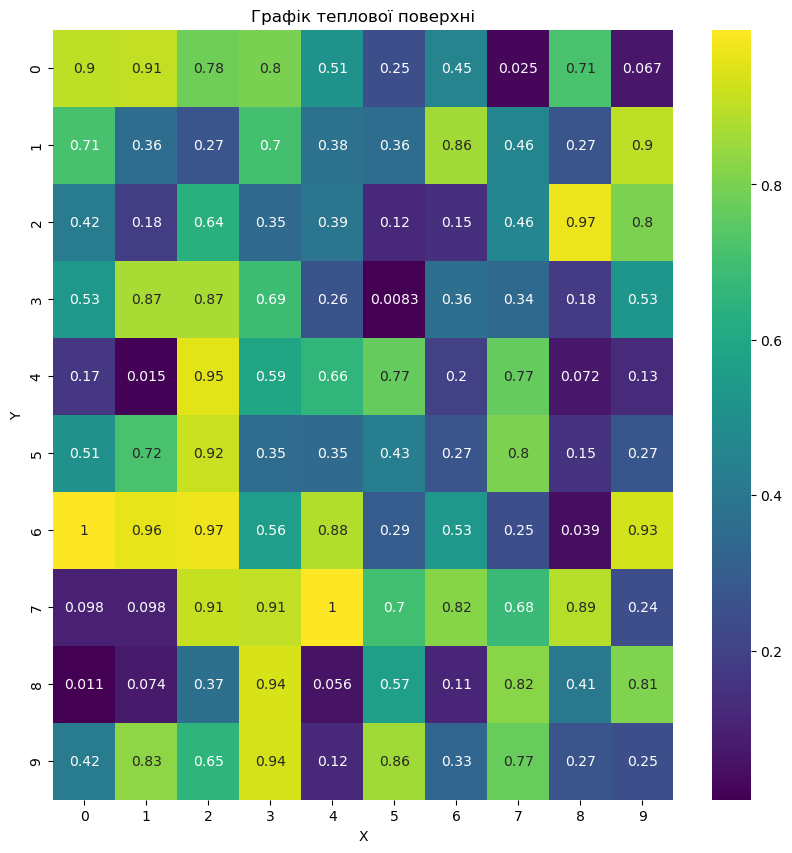

In [93]:
plt.figure(figsize=(10, 10))
sns.heatmap(matrix, annot=True, cmap='viridis')
plt.title('–ì—Ä–∞—Ñ—ñ–∫ —Ç–µ–ø–ª–æ–≤–æ—ó –ø–æ–≤–µ—Ä—Ö–Ω—ñ')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()